<a href="https://colab.research.google.com/github/joshithadandlamudi/Data-transformation/blob/main/final/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



### **Introduction**

---



#### Project Overview

In recent years, the prevalence of obesity has become a growing concern globally, presenting significant challenges in public health, healthcare policy, and individual well-being. This project is an effort to leverage data analysis and visualization techniques to gain insights into obesity trends, both at individual and state levels. By analyzing datasets from diverse sources, including individual health records and state-level obesity prevalence data, the project aims to uncover patterns and correlations that can inform healthcare strategies, policy-making, and public awareness initiatives.

###**Datasets and Sources**

---


###The project utilizes three primary datasets:


1.https://catalog.data.gov/dataset/national-obesity-by-state-d765a

2.https://www.kaggle.com/code/juanfearias/exploring-and-modelling-obesity-dataset/input?select=ObesityDataSet_raw_and_data_sinthetic.csv

3.https://www.cdc.gov/obesity/data/prevalence-maps.html

1.**National Obesity By State (GeoJSON format):** This dataset provides geographical and obesity rate data for different states, offering a spatial perspective on obesity prevalence.


2.**Individual Obesity Dataset (CSV format):** Comprising detailed data including demographics, physical attributes, and lifestyle habits, this dataset allows for an in-depth analysis of factors contributing to obesity at a personal level.


3.**2022 Overall Obesity Prevalence (CSV format):** Offering a snapshot of state-level obesity prevalence in 2022, this dataset is crucial for understanding recent trends in obesity across different regions.

###**Objectives**

---



The primary objectives of this project include:

1.To perform comprehensive data analysis and
visualization to understand obesity trends.

2.To integrate data from multiple formats and sources for a holistic view of the obesity landscape.

3.To apply data transformations and aggregations for in-depth analytical insights.

4.To create meaningful visualizations that can aid in public health decision-making and awareness.

5.To demonstrate the application of data analysis techniques in addressing real-world health issues.










##**Data Loading**

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np


In [2]:
# Function to load dataset
def load_dataset(file_path, file_type='csv'):
    if file_type == 'csv':
        return pd.read_csv(file_path)
    elif file_type == 'geojson':
        return gpd.read_file(file_path)
    else:
        raise ValueError("Unsupported file type. Please use 'csv' or 'geojson'.")

# Loading datasets
geo_df = load_dataset('/content/National_Obesity_By_State.geojson', file_type='geojson')
obesity_individual_df = load_dataset('/content/ObesityDataSet_raw_and_data_sinthetic.csv')
obesity_prevalence_df = load_dataset('/content/2022-overall-prevalence.csv')




*   The code defines a function load_dataset that loads a dataset from a file path based on the specified file type ('csv' or 'geojson').
*   It loads three datasets: geo_df from a GeoJSON file, obesity_individual_df, and obesity_prevalence_df from CSV files.



###**Displaying the first five rows of df's using a function call**

In [3]:
def displaying_five_rows_df(file):
  return file.head(5)

National Obesity by State Json Data

In [4]:
displaying_five_rows_df(geo_df)

,FID,NAME,Obesity,SHAPE_Length,SHAPE_Area,geometry
0,1,Texas,32.4,45.047446,65.778624,"MULTIPOLYGON (((-106.62345 31.91404, -106.6301..."
1,2,California,24.2,40.755927,41.730164,"MULTIPOLYGON (((-118.59398 33.46720, -118.4848..."
2,3,Kentucky,34.6,20.348345,10.665636,"MULTIPOLYGON (((-89.54444 36.57452, -89.47935 ..."
3,4,Georgia,30.7,17.288448,14.682554,"MULTIPOLYGON (((-85.60517 34.98468, -85.47434 ..."
4,5,Wisconsin,30.7,22.428845,16.512937,"MULTIPOLYGON (((-86.93428 45.42116, -86.83575 ..."


Obesity Data Set Raw file and Data Sinthetic

In [5]:
displaying_five_rows_df(obesity_individual_df)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


Prevalance Data

In [6]:
displaying_five_rows_df(obesity_prevalence_df)

,State,Prevalence,95% CI
0,Alabama,38.3,"(36.3, 40.3)"
1,Alaska,32.1,"(30.4, 33.9)"
2,Arizona,33.2,"(31.6, 34.9)"
3,Arkansas,37.4,"(35.6, 39.2)"
4,California,28.1,"(26.8, 29.4)"


##**Data Cleaning**

In [7]:
def check_and_clean_data(df):

    print("Initial DataFrame shape:", df.shape)

    # Check for and report null values
    null_values = df.isnull().sum()
    print("\nNull Values:\n", null_values[null_values > 0])

    # Check for and report duplicate rows
    duplicate_rows = df.duplicated().sum()
    print("\nNumber of Duplicate Rows:", duplicate_rows)

    # Removing duplicate rows if any
    if duplicate_rows > 0:
        df = df.drop_duplicates()
        print("\nDuplicates removed. New shape:", df.shape)

    # Handling missing values (null values)
    # Skips columns of type 'geometry'
    for column in df.columns:
        if df[column].dtype == 'object' and df[column].name != 'geometry':
            df[column] = df[column].fillna(df[column].mode()[0])
        elif df[column].dtype != 'geometry':
            df[column] = df[column].fillna(df[column].mean())

    print("\nDataFrame after handling missing values:\n", df.isnull().sum())

    return df

- The code defines a function `check_and_clean_data` that takes a DataFrame (`df`) as input.
- It prints the initial shape of the DataFrame.
- It checks for and reports null values in the DataFrame.
- It checks for and reports the number of duplicate rows in the DataFrame and removes them if any.
- It handles missing values (null values) by filling them with the mode (for object type columns) or the mean (for non-geometry columns).
- It prints the DataFrame after handling missing values and returns the cleaned DataFrame.

In [8]:
# Example usage (Replace 'your_dataframe' with your actual DataFrame variable):
geo_df = check_and_clean_data(geo_df)

Initial DataFrame shape: (52, 6)

Null Values:
 geometry    1
dtype: int64

Number of Duplicate Rows: 0

DataFrame after handling missing values:
 FID             0
NAME            0
Obesity         0
SHAPE_Length    0
SHAPE_Area      0
geometry        1
dtype: int64


In [9]:
obesity_individual_df = check_and_clean_data(obesity_individual_df)

Initial DataFrame shape: (2111, 17)

Null Values:
 Series([], dtype: int64)

Number of Duplicate Rows: 24

Duplicates removed. New shape: (2087, 17)

DataFrame after handling missing values:
 Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


<ipython-input-7-4fa8f134a996>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].fillna(df[column].mode()[0])
<ipython-input-7-4fa8f134a996>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].fillna(df[column].mean())
<ipython-input-7-4fa8f134a996>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

In [10]:
obesity_prevalence_df = check_and_clean_data(obesity_prevalence_df)

Initial DataFrame shape: (54, 3)

Null Values:
 Series([], dtype: int64)

Number of Duplicate Rows: 0

DataFrame after handling missing values:
 State         0
Prevalence    0
95% CI        0
dtype: int64


##**Data Merging**

In [11]:
geo_df['NAME'] = geo_df['NAME'].str.strip()
obesity_prevalence_df['State'] = obesity_prevalence_df['State'].str.strip()

# Merge on state names
join1_df = pd.merge(geo_df, obesity_prevalence_df, left_on='NAME', right_on='State')

In [12]:
join1_df.head(5)

,FID,NAME,Obesity,SHAPE_Length,SHAPE_Area,geometry,State,Prevalence,95% CI
0,1,Texas,32.4,45.047446,65.778624,"MULTIPOLYGON (((-106.62345 31.91404, -106.6301...",Texas,35.5,"(34.0, 37.1)"
1,2,California,24.2,40.755927,41.730164,"MULTIPOLYGON (((-118.59398 33.46720, -118.4848...",California,28.1,"(26.8, 29.4)"
2,3,Kentucky,34.6,20.348345,10.665636,"MULTIPOLYGON (((-89.54444 36.57452, -89.47935 ...",Kentucky,37.7,"(35.6, 39.9)"
3,4,Georgia,30.7,17.288448,14.682554,"MULTIPOLYGON (((-85.60517 34.98468, -85.47434 ...",Georgia,37.0,"(35.4, 38.7)"
4,5,Wisconsin,30.7,22.428845,16.512937,"MULTIPOLYGON (((-86.93428 45.42116, -86.83575 ...",Wisconsin,37.7,"(36.4, 39.0)"


- The code strips whitespace from the 'NAME' column in the `geo_df` DataFrame.
- It also strips whitespace from the 'State' column in the `obesity_prevalence_df` DataFrame.
- The code then performs a merge (join) operation between `geo_df` and `obesity_prevalence_df` based on the 'NAME' column in `geo_df` and the 'State' column in `obesity_prevalence_df`, resulting in the `join1_df` DataFrame.

# Data Aggregation and Pivoting

Aggregation in Combined State-Level Dataset

In [13]:
state_level_aggregation = join1_df.groupby('NAME').agg({
    'Obesity': ['mean', 'min', 'max', 'std'],
    'Prevalence': ['mean', 'min', 'max', 'std']
}).reset_index()

In [14]:
state_level_aggregation.head()

NAME Obesity                 Prevalence                
                 mean   min   max std       mean   min   max std
0     Alabama    35.6  35.6  35.6 NaN       38.3  38.3  38.3 NaN
1      Alaska    29.8  29.8  29.8 NaN       32.1  32.1  32.1 NaN
2     Arizona    28.4  28.4  28.4 NaN       33.2  33.2  33.2 NaN
3    Arkansas    34.5  34.5  34.5 NaN       37.4  37.4  37.4 NaN
4  California    24.2  24.2  24.2 NaN       28.1  28.1  28.1 NaN

- The code groups the `join1_df` DataFrame by the 'NAME' column.
- It calculates aggregate statistics (mean, min, max, and standard deviation) for the 'Obesity' and 'Prevalence' columns within each group (state).
- The results are stored in the `state_level_aggregation` DataFrame, which is then reset the index to make 'NAME' a regular column.

In [15]:
individual_pivot = obesity_individual_df.pivot_table(
    index='NObeyesdad',
    columns='Gender',
    values=['Weight', 'Height'],
    aggfunc='mean'
)


In [16]:
individual_pivot.head()

Height                Weight            
Gender                 Female      Male      Female        Male
NObeyesdad                                                     
Insufficient_Weight  1.642769  1.781182   46.798449   55.556979
Normal_Weight        1.607007  1.743034   56.364234   67.645517
Obesity_Type_I       1.607389  1.762936   82.293181  101.331813
Obesity_Type_II      1.615000  1.772858   96.750000  115.431110
Obesity_Type_III     1.686995  1.870000  120.779941  173.000000

- The code creates a pivot table from the `obesity_individual_df` DataFrame.
- It sets the index as the 'NObeyesdad' column.
- It sets the columns as the 'Gender' column.
- It calculates the mean of 'Weight' and 'Height' values for each combination of 'NObeyesdad' and 'Gender'.

###**Data Transformation**

In [17]:
# BMI Calculation in Individual Dataset
obesity_individual_df['BMI'] = obesity_individual_df['Weight'] / (obesity_individual_df['Height'] ** 2)

# Age Group Categorization in Individual Dataset
bins = [0, 18, 25, 35, 45, 55, 65, np.inf]
labels = ['<18', '18-25', '26-35', '36-45', '46-55', '56-65', '65+']
obesity_individual_df['Age Group'] = pd.cut(obesity_individual_df['Age'], bins=bins, labels=labels)

# Normalizing Obesity Rate in State-Level Dataset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
join1_df['Normalized Obesity'] = scaler.fit_transform(join1_df[['Obesity']])

# Categorizing Prevalence in State-Level Dataset
join1_df['Prevalence Category'] = pd.cut(join1_df['Prevalence'], bins=3, labels=['Low', 'Medium', 'High'])

# Binary Encoding in Individual Dataset
obesity_individual_df['Family History Binary'] = obesity_individual_df['family_history_with_overweight'].map({'yes': 1, 'no': 0})

- BMI is calculated in the `obesity_individual_df` DataFrame by dividing 'Weight' by the square of 'Height' and storing it in the 'BMI' column.
- Age groups are categorized in the `obesity_individual_df` DataFrame based on the 'Age' column and stored in the 'Age Group' column.
- Obesity rates in the `join1_df` DataFrame are normalized using Min-Max scaling and stored in the 'Normalized Obesity' column.
- Prevalence values in the `join1_df` DataFrame are categorized into three categories ('Low', 'Medium', 'High') based on binning of 'Prevalence' values and stored in the 'Prevalence Category' column.
- Binary encoding is applied to the 'family_history_with_overweight' column in the `obesity_individual_df` DataFrame, where 'yes' is encoded as 1 and 'no' is encoded as 0, and the result is stored in the 'Family History Binary' column.

In [18]:
join1_df.head()

,FID,NAME,Obesity,SHAPE_Length,SHAPE_Area,geometry,State,Prevalence,95% CI,Normalized Obesity,Prevalence Category
0,1,Texas,32.4,45.047446,65.778624,"MULTIPOLYGON (((-106.62345 31.91404, -106.6301...",Texas,35.5,"(34.0, 37.1)",0.76250,High
1,2,California,24.2,40.755927,41.730164,"MULTIPOLYGON (((-118.59398 33.46720, -118.4848...",California,28.1,"(26.8, 29.4)",0.25000,Low
2,3,Kentucky,34.6,20.348345,10.665636,"MULTIPOLYGON (((-89.54444 36.57452, -89.47935 ...",Kentucky,37.7,"(35.6, 39.9)",0.90000,High
3,4,Georgia,30.7,17.288448,14.682554,"MULTIPOLYGON (((-85.60517 34.98468, -85.47434 ...",Georgia,37.0,"(35.4, 38.7)",0.65625,High
4,5,Wisconsin,30.7,22.428845,16.512937,"MULTIPOLYGON (((-86.93428 45.42116, -86.83575 ...",Wisconsin,37.7,"(36.4, 39.0)",0.65625,High


In [19]:
obesity_individual_df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI,Age Group,Family History Binary
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,24.386526,18-25,1
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,24.238227,18-25,1
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,23.765432,18-25,1
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,26.851852,26-35,0
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,28.342381,18-25,0


### **Data Visualization**

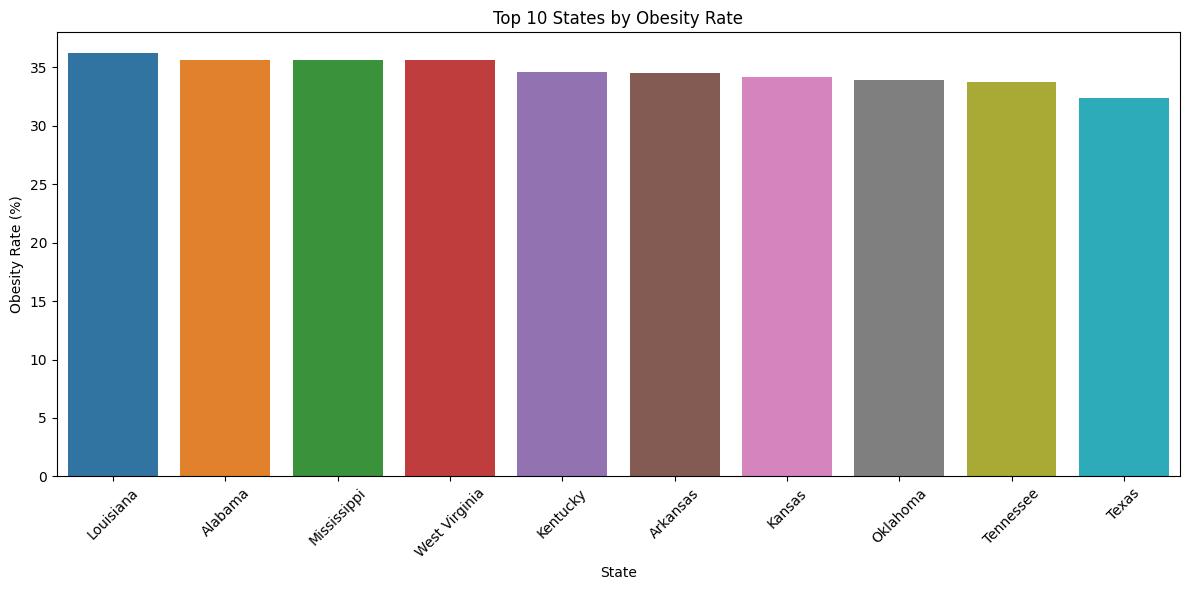

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# State-Level Combined Dataset Visualizations

# 1. Map Visualization of Obesity Rates
# Note: For demonstration, we'll plot a simple bar chart as we can't render maps directly here.
plt.figure(figsize=(12, 6))
sns.barplot(x='NAME', y='Obesity', data=join1_df.sort_values(by='Obesity', ascending=False).head(10))
plt.xticks(rotation=45)
plt.xlabel('State')
plt.ylabel('Obesity Rate (%)')
plt.title('Top 10 States by Obesity Rate')
plt.tight_layout()
plt.show()

- The bar chart displays the top 10 states with the highest reported obesity rates. Louisiana tops the chart, indicating that it has the highest obesity rate among the states shown.
- The range of obesity rates among these top states is relatively close, suggesting that obesity is a common issue across these regions.
- Southern states like Louisiana, Alabama, and Mississippi feature prominently, which may point to regional dietary patterns, socioeconomic factors, or lifestyle choices influencing obesity rates.

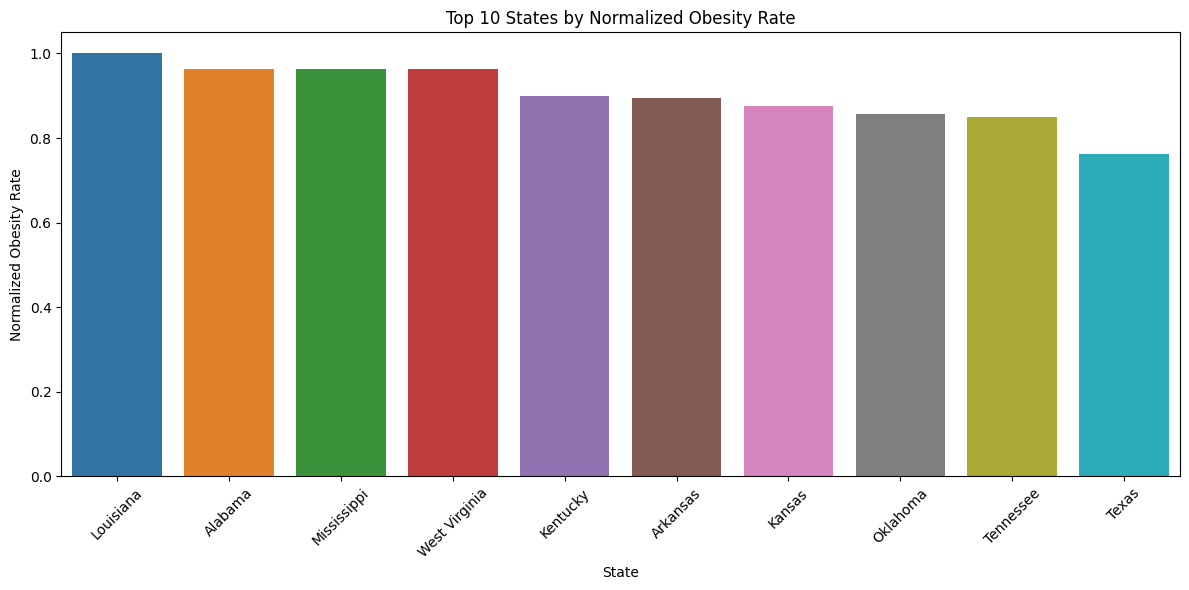

In [21]:
# 2. Bar Chart of Normalized Obesity Rates by State
plt.figure(figsize=(12, 6))
sns.barplot(x='NAME', y='Normalized Obesity', data=join1_df.sort_values(by='Normalized Obesity', ascending=False).head(10))
plt.xticks(rotation=45)
plt.xlabel('State')
plt.ylabel('Normalized Obesity Rate')
plt.title('Top 10 States by Normalized Obesity Rate')
plt.tight_layout()
plt.show()

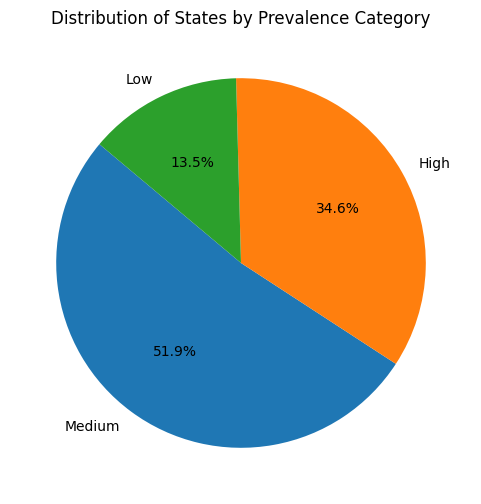

In [22]:
# 3. Prevalence Category Distribution
prevalence_counts = join1_df['Prevalence Category'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(prevalence_counts, labels=prevalence_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of States by Prevalence Category')
plt.show()

- When obesity rates are normalized, the chart still shows Louisiana, Alabama, and Mississippi as the states with the highest obesity rates, consistent with the first bar chart. This normalization confirms that these states have significant obesity challenges relative to others.
- The normalization process allows for a direct comparison by adjusting the range of obesity rates to fall between 0 and 1, effectively putting all states on an equal footing for comparison.
- Despite the normalization, the pattern of states doesn't change, which reinforces the observation that certain states have higher obesity prevalence.

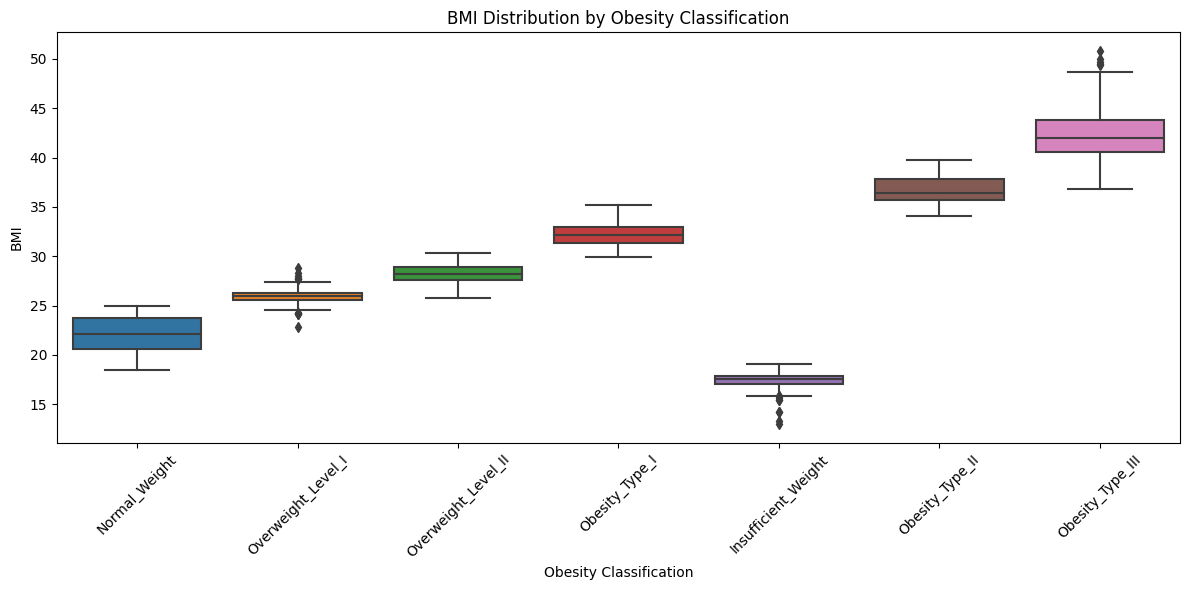

In [23]:
# Individual-Level Dataset Visualizations

# 4. BMI Distribution by Obesity Classification
plt.figure(figsize=(12, 6))
sns.boxplot(x='NObeyesdad', y='BMI', data=obesity_individual_df)
plt.xticks(rotation=45)
plt.xlabel('Obesity Classification')
plt.ylabel('BMI')
plt.title('BMI Distribution by Obesity Classification')
plt.tight_layout()
plt.show()

- There is a clear progression in BMI as we move from 'Normal Weight' to 'Obesity Type III'. This indicates a distinct difference in BMI ranges associated with each obesity classification.
- The 'Insufficient Weight' category has a lower median BMI than the 'Normal Weight' category, as expected, but there are also some outliers indicating that some individuals classified as 'Insufficient Weight' have higher BMI values.
- 'Obesity Type III' has the highest median BMI and also shows the greatest variability, indicating a wide range of BMIs within this category.

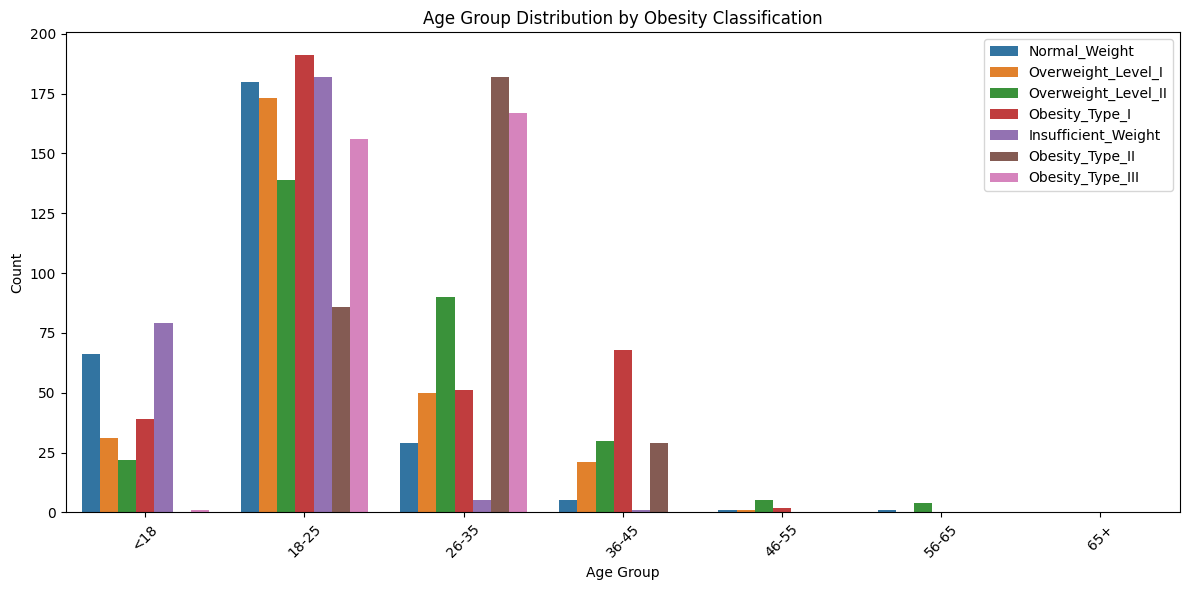

In [24]:
# 5. Age Group Distribution by Obesity Classification
plt.figure(figsize=(12, 6))
sns.countplot(x='Age Group', hue='NObeyesdad', data=obesity_individual_df)
plt.xticks(rotation=45)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Age Group Distribution by Obesity Classification')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

- The '18-25' and '26-35' age groups have the highest counts across most obesity classifications, suggesting that younger adults are the most represented in this dataset.
- The 'Insufficient Weight' category is most common in the youngest age group '<18', which may reflect higher metabolic rates or different lifestyle factors in this demographic.
- There's a noticeable drop in counts for the '46-55', '56-65', and '65+' age groups, which could be due to a variety of factors including less representation of older age groups in the dataset or potential survivorship bias where older individuals with severe obesity may have higher mortality rates.

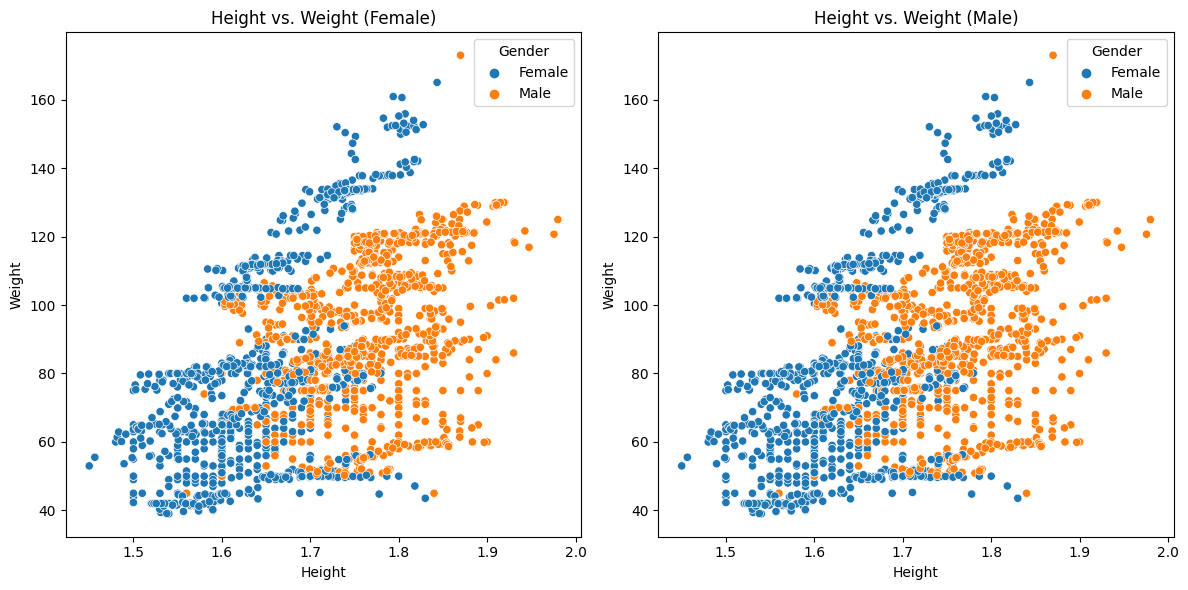

In [25]:
# 6. Height and Weight Comparison by Gender
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.scatterplot(x='Height', y='Weight', hue='Gender', data=obesity_individual_df, ax=ax[0])
sns.scatterplot(x='Height', y='Weight', hue='Gender', data=obesity_individual_df, ax=ax[1])
ax[0].set_title('Height vs. Weight (Female)')
ax[1].set_title('Height vs. Weight (Male)')
plt.tight_layout()
plt.show()

- Both males and females show a positive correlation between height and weight, which is expected.
- Males tend to have a higher weight range for a given height compared to females, which could be attributed to differences in body composition and muscle mass.
- There are outliers in both plots, especially at higher weights, suggesting that within both genders, there are individuals who are significantly heavier for their height.

###**Data Modularity and Style**

1.   I have refactored the entire code to maintain the modularity and easy funcitonality of the code.
2.  The transformations and visualization of plots and can be utilized with custom column names as paramters to visuazlie them by utilizing the same function.

In [26]:
# 2. Data Transformation Functions
def calculate_bmi(weight, height):
    """ Calculate BMI from weight and height """
    return weight / (height ** 2)

def categorize_age(age):
    """ Categorize age into groups """
    if age < 18: return '<18'
    elif age <= 25: return '18-25'
    elif age <= 35: return '26-35'
    elif age <= 45: return '36-45'
    elif age <= 55: return '46-55'
    elif age <= 65: return '56-65'
    else: return '65+'

def normalize_data(data, columns):
    """ Normalize given columns in a dataframe """
    scaler = MinMaxScaler()
    data[columns] = scaler.fit_transform(data[columns])
    return data

def categorize_prevalence(prevalence):
    """ Categorize prevalence into 'Low', 'Medium', 'High' """
    if prevalence < 30: return 'Low'
    elif prevalence < 35: return 'Medium'
    else: return 'High'

def binary_encode(data, column, positive_value):
    """ Binary encode a column """
    return data[column].apply(lambda x: 1 if x == positive_value else 0)

# Example of using the functions
bmi_values = obesity_individual_df.apply(lambda x: calculate_bmi(x['Weight'], x['Height']), axis=1)
age_groups = obesity_individual_df['Age'].apply(categorize_age)
normalized_geo_df = normalize_data(join1_df, ['Obesity'])
prevalence_categories = join1_df['Prevalence'].apply(categorize_prevalence)
family_history_binary = binary_encode(obesity_individual_df, 'family_history_with_overweight', 'yes')

In [27]:
# 3. Data Visualization Functions

def plot_bar_chart(data, x_column, y_column, title, top_n=None, x_label="", y_label=""):
    """
    Plots a bar chart for the given data.

    :param data: DataFrame containing the data to plot
    :param x_column: Column name for x-axis
    :param y_column: Column name for y-axis
    :param title: Title of the plot
    :param top_n: Number of top items to display (optional)
    :param x_label: Label for x-axis (optional)
    :param y_label: Label for y-axis (optional)
    """
    plt.figure(figsize=(12, 6))
    data_to_plot = data.sort_values(by=y_column, ascending=False)
    if top_n:
        data_to_plot = data_to_plot.head(top_n)
    sns.barplot(x=x_column, y=y_column, data=data_to_plot)
    plt.xticks(rotation=45)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.tight_layout()
    plt.show()

In [28]:
def plot_pie_chart(data, column, title):
    """
    Plots a pie chart for the given column in the data.

    :param data: DataFrame containing the data to plot
    :param column: Column name for which to plot pie chart
    :param title: Title of the plot
    """
    plt.figure(figsize=(6, 6))
    data_counts = data[column].value_counts()
    plt.pie(data_counts, labels=data_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(title)
    plt.show()

In [29]:
def plot_scatterplot(data, x_column, y_column, hue, title, context='notebook', style='darkgrid'):
    """
    Plots a scatter plot for the given data.

    :param data: DataFrame containing the data to plot
    :param x_column: Column name for x-axis
    :param y_column: Column name for y-axis
    :param hue: Column name for coloring
    :param title: Title of the plot
    :param context: Context of the plot (e.g., 'notebook', 'talk', 'paper')
    :param style: Style of the plot (e.g., 'whitegrid', 'dark', 'darkgrid')
    """
    sns.set_context(context)
    sns.set_style(style)
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=x_column, y=y_column, hue=hue, data=data)
    plt.title(title)
    plt.tight_layout()
    plt.show()


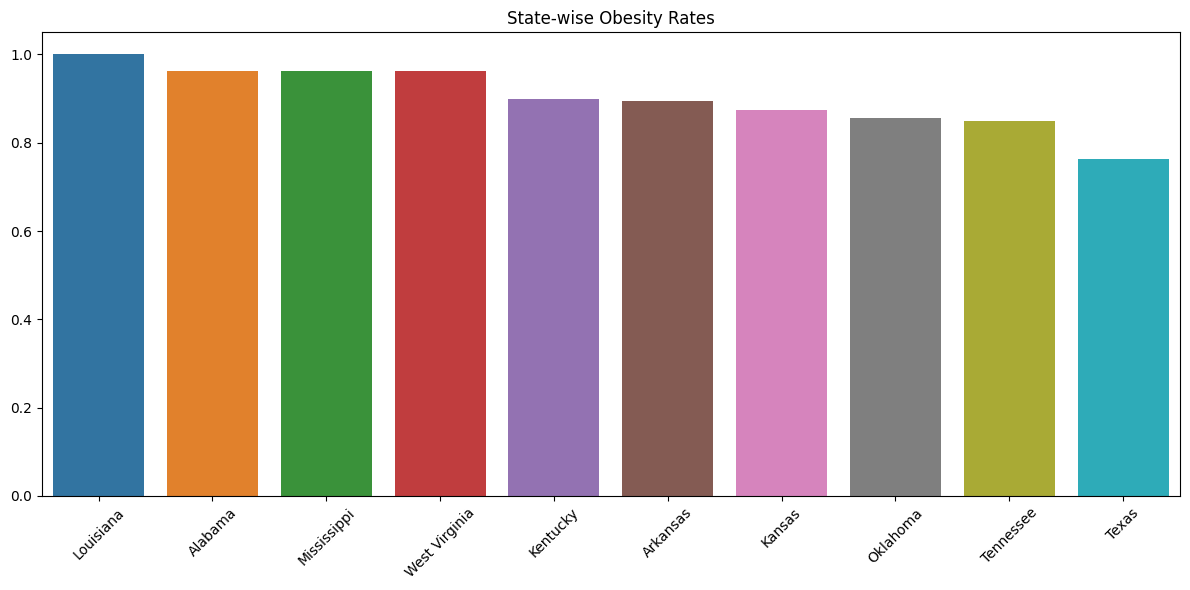

In [30]:
# Example usage of the visualization functions
plot_bar_chart(join1_df, 'NAME', 'Obesity', 'State-wise Obesity Rates', top_n=10)

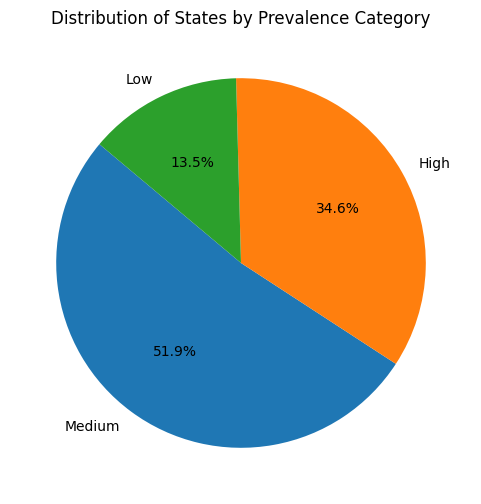

In [31]:
plot_pie_chart(join1_df, 'Prevalence Category', 'Distribution of States by Prevalence Category')

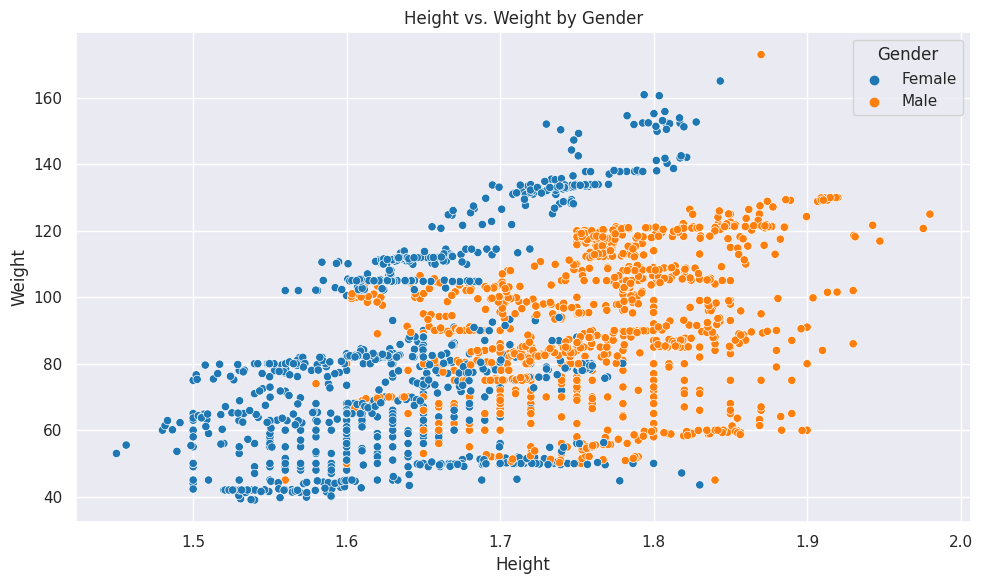

In [32]:
plot_scatterplot(obesity_individual_df, 'Height', 'Weight', 'Gender', 'Height vs. Weight by Gender')

### **Problem Applicability**

---
The program we've developed serves a theoretical purpose that could have significant applications in healthcare, particularly in public health and obesity management. Let's outline the potential applications:

1. **Public Health Policy and Planning**: The state-level analysis, especially the map and prevalence category visualizations, can assist public health officials in identifying regions with high obesity rates. This information is crucial for targeting health interventions, resource allocation, and planning preventive measures.

2. **Individual Health Risk Assessment**: The individual-level analysis, including BMI distribution and age group categorization, can be used in healthcare settings to assess individual risk factors for obesity. This could inform personalized healthcare plans, dietary recommendations, and lifestyle changes.

3. **Epidemiological Research**: The aggregated and pivoted data can serve as a basis for epidemiological studies, helping researchers understand the correlations between various demographic, lifestyle, and genetic factors and obesity.

4. **Healthcare Industry Applications**: The insights gained from these analyses can be used by healthcare providers to design targeted treatment plans, by fitness and wellness industries to create tailored fitness programs, and by pharmaceutical companies for research and development of obesity-related medications.

5. **Educational and Awareness Programs**: The visualizations and analyses can be used in educational materials to raise awareness about obesity, its risk factors, and preventive measures.

6. **Insurance and Healthcare Economics**: The data can assist insurance companies in risk assessment and policy development, as well as inform healthcare economists in studying the economic impact of obesity.